## TSF GRIP April'21
### Technical Task 2: Prediction using Unsupervised ML

To predict the optimal number of clusters for the iris dataset
### Author: Apoorva Khairnar

#### Step 1: Importing libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

#### Step 2: Loading the dataset

In [72]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['Species'] = iris.target
df.head(10)
# 0: Iris-setosa
# 1: Iris-versicolor
# 2: Iris-virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


#### Step 3: Visualizing the data

Text(0.5, 1.0, 'Petal width')

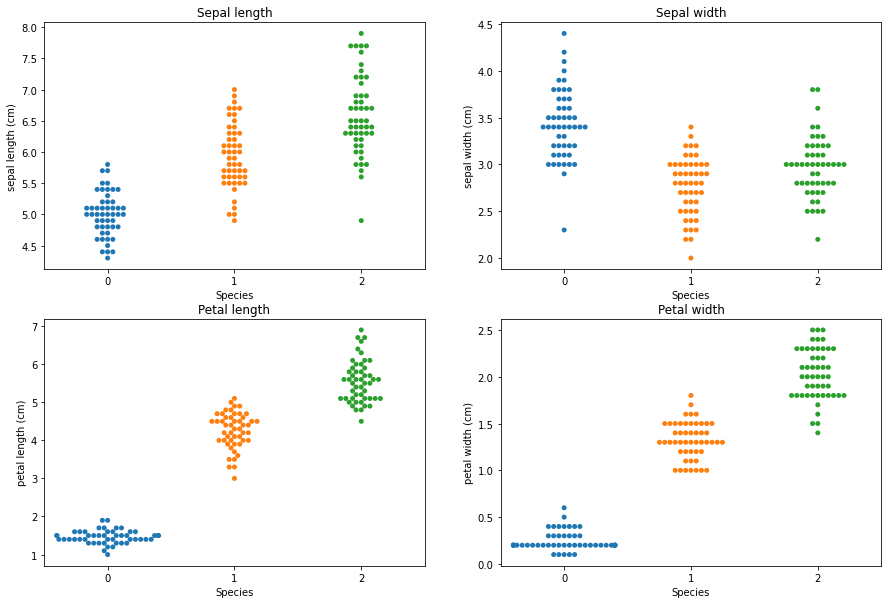

In [37]:
# Swarm plot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.swarmplot(ax=axs[0, 0], x='Species', y='sepal length (cm)', data=df)
axs[0, 0].set_title('Sepal length')
sns.swarmplot(ax=axs[0, 1], x='Species', y='sepal width (cm)', data=df)
axs[0, 1].set_title('Sepal width')
sns.swarmplot(ax=axs[1, 0], x='Species', y='petal length (cm)', data=df)
axs[1, 0].set_title('Petal length')
sns.swarmplot(ax=axs[1, 1], x='Species', y='petal width (cm)', data=df)
axs[1, 1].set_title('Petal width')

#### Step 4: Finding the optimal number of clusters

In [102]:
# Defining features and labels
X = df.iloc[:, 0:4].values
y = df['Species']

# Calculating WCSS
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

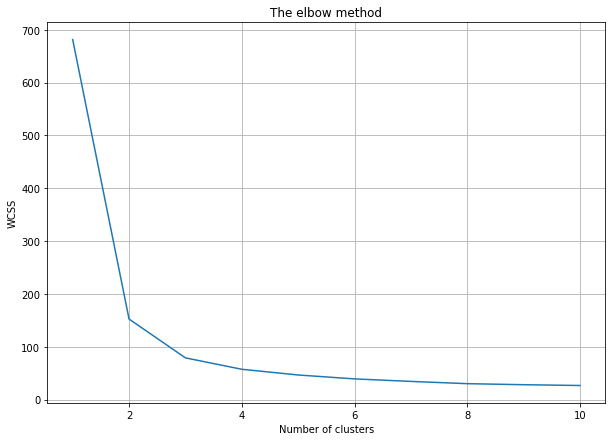

In [53]:
# Plotting WCSS Vs Number of clusters
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Number of clusters = 3 is the point at which the elbow shape is created. Also, there is no significant decrease in the value of WCSS after 3. Hence, the optimal number of clusters can be taken as 3.

#### Step 5: Developing the model

In [97]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [100]:
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

#### Step 6: Visualizing the clusters

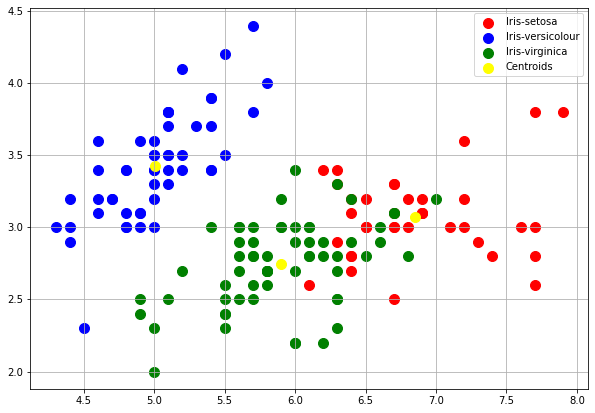

In [99]:
plt.figure(figsize=(10, 7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.grid()
plt.show()